In [1]:
import seaborn as sns
from astropy.io import fits
from multiprocessing import Pool
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy.stats import binned_statistic_2d
from astropy.table import Table
from utils import load_datasets
plt.rcParams['axes.linewidth']= 3.
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (16,16)



In [2]:
SDSS, TNG50, TNG, Illustris = load_datasets(orig=True)

In [3]:
SDSS_large = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/Catalog_SDSS_complete_NotTrunc.dat', sep=' ')
SDSS_SFR = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/SDSS_SFR.csv')
SDSS_large = SDSS_large.merge(SDSS_SFR, on='galcount')
SDSS_large = SDSS_large.rename(columns={'MsMendSerExp':'Mstar','MhaloL':'Mhalo'})

In [6]:
SDSS_large = SDSS_large.query('zMeert<0.1')

In [13]:
SDSS_large['sSFR'] = SDSS_large.apply(lambda row: row.MEDIANSFR-row.Mstar,axis=1)
SDSS['mediansSFR'] = SDSS.apply(lambda row: row.MEDIANSFR-row.Mstar,axis=1)

/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


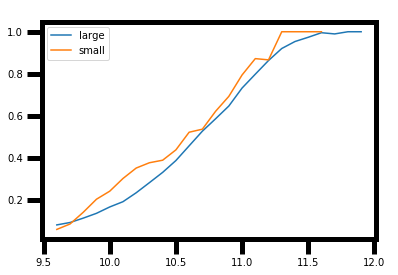

In [14]:
bins=np.arange(9.5,12,0.1)
hq = np.histogram(SDSS_large.query('sSFR<-11')['Mstar'],bins=bins)[0]
h = np.histogram(SDSS_large['Mstar'],bins=bins)[0]
plt.plot(bins[1:],hq/h, label='large')
hq = np.histogram(SDSS.query('mediansSFR<-11')['Mstar'],bins=bins)[0]
h = np.histogram(SDSS['Mstar'],bins=bins)[0]
plt.plot(bins[1:],hq/h, label='small')
plt.legend()

In [34]:
SDSS_large_cen = SDSS_large.query('LCentSat==1')
SDSS_large_sat = SDSS_large.query('LCentSat==0')

In [3]:


SDSS_cen = SDSS.query('LCentSat==1')
TNG_cen = TNG.query('LCentSat==1')
TNG50_cen = TNG50.query('LCentSat==1')
Illustris_cen = Illustris.query('LCentSat==1')

SDSS_sat = SDSS.query('LCentSat==0')
TNG_sat = TNG.query('LCentSat==0')
TNG50_sat = TNG50.query('LCentSat==0')
Illustris_sat = Illustris.query('LCentSat==0')

SDSS_Q = SDSS.query('sSFR<-11')
SDSS_SF = SDSS.query('sSFR>-11')

TNG_Q = TNG.query('sSFR<-11')
TNG_SF = TNG.query('sSFR>-11')

TNG50_Q = TNG50.query('sSFR<-11')
TNG50_SF = TNG50.query('sSFR>-11')

Illustris_Q = Illustris.query('sSFR<-11')
Illustris_SF = Illustris.query('sSFR>-11')


SDSS_cen_Q = SDSS_cen.query('sSFR<-11') #ToDo: TNG50 SF & Q; cen & sat
TNG_cen_Q = TNG_cen.query('sSFR<-11')
TNG50_cen_Q = TNG50_cen.query('sSFR<-11')
Illustris_cen_Q = Illustris_cen.query('sSFR<-11')

SDSS_sat_Q = SDSS_sat.query('sSFR<-11')
TNG_sat_Q = TNG_sat.query('sSFR<-11')
TNG50_sat_Q = TNG50_sat.query('sSFR<-11')
Illustris_sat_Q = Illustris_sat.query('sSFR<-11')

SDSS_cen_SF = SDSS_cen.query('sSFR>-11')
TNG_cen_SF = TNG_cen.query('sSFR>-11')
TNG50_cen_SF = TNG50_cen.query('sSFR>-11')
Illustris_cen_SF = Illustris_cen.query('sSFR>-11')

SDSS_sat_SF = SDSS_sat.query('sSFR>-11')
TNG_sat_SF = TNG_sat.query('sSFR>-11')
TNG50_sat_SF = TNG50_sat.query('sSFR>-11')
Illustris_sat_SF = Illustris_sat.query('sSFR>-11')

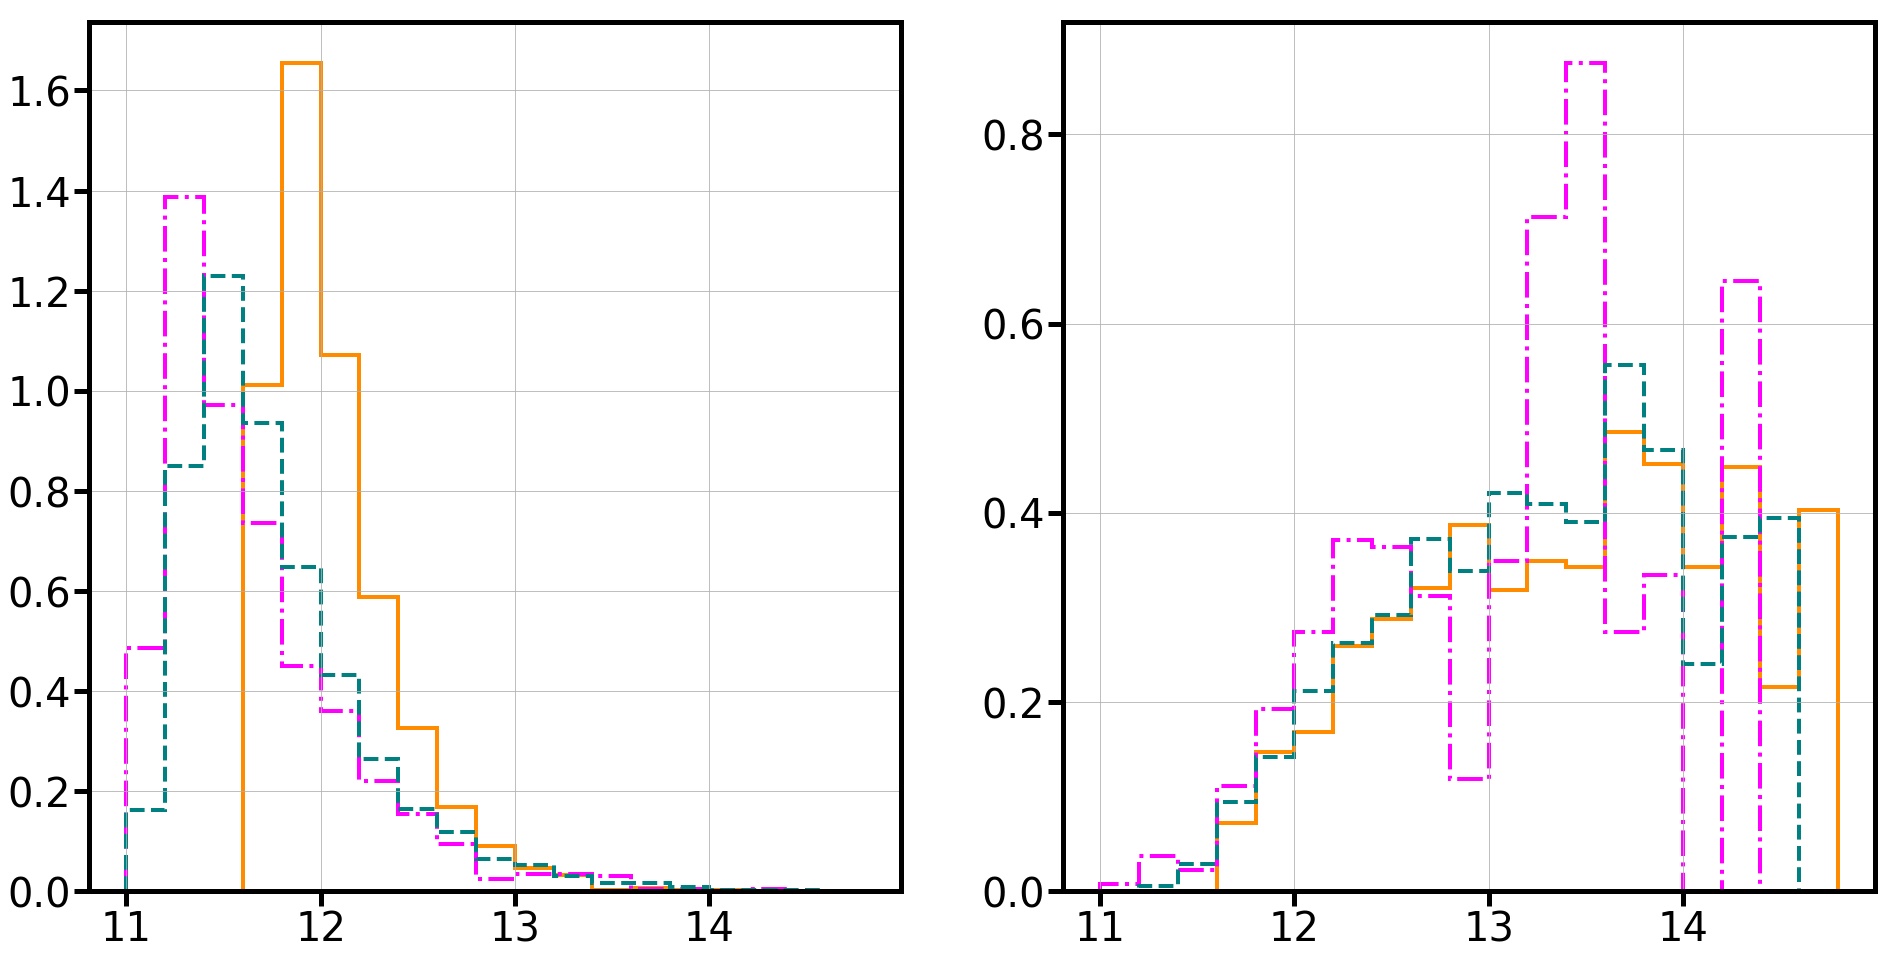

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(32,16))

bins = np.arange(11,15,0.2)
SDSS_cen['Mhalo'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=True,ax=ax1, ls='-')
TNG50_cen['Mhalo'].hist(bins=bins, color='magenta',lw=4, histtype='step', density=True,ax=ax1,ls='-.')
TNG_cen['Mhalo'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True,ax=ax1, ls='--')


SDSS_sat['Mhalo'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=True,ax=ax2, ls='-')
TNG50_sat['Mhalo'].hist(bins=bins, color='magenta',lw=4, histtype='step', density=True,ax=ax2,ls='-.')
TNG_sat['Mhalo'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True,ax=ax2, ls='--')

In [52]:
SDSS.query('Mhalo>14').count()

likelihood               1037
objid                    1037
galcount                 1037
mag                      1037
Unnamed: 0               1037
mag_x                    1037
Unnamed: 0.1             1037
mag_y                    1037
Unnamed: 0.1.1           1037
galsky                   1037
skysig                   1037
m_bulge                  1037
r_bulge                  1037
ba_bulge                 1037
n_bulge                  1037
GalSky                   1037
GalSky_err               1037
chi2nu                   1037
finalflag                1037
z                        1037
Mstar                    1037
aa                       1037
airmass                  1037
kk                       1037
GalSky_SDSS              1037
skySig_r                 1037
LCentSat                 1037
Mhalo                    1037
veldisp                  1037
TType                    1037
                         ... 
ba_bulge_shuffled        1037
n_bulge_shuffled         1037
GalSky_shu

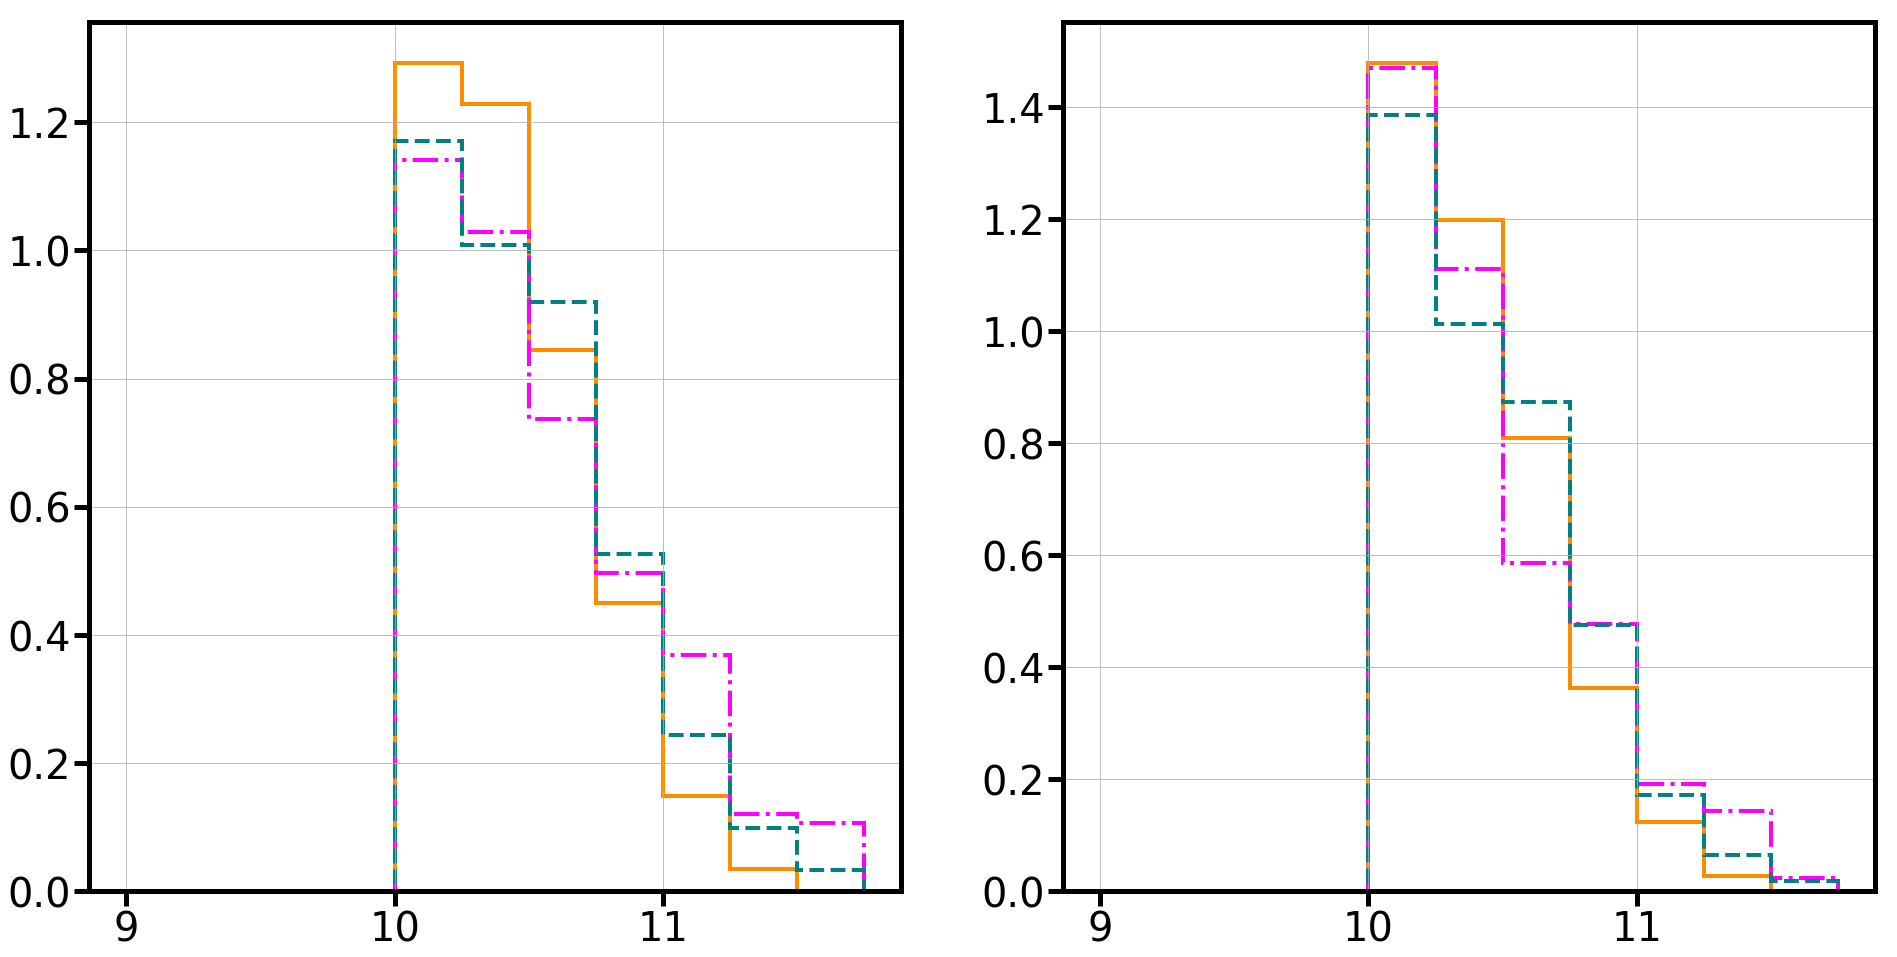

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(32,16))

bins = np.arange(9,12,0.25)
SDSS_cen.query('Mstar>10')['Mstar'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=True,ax=ax1, ls='-')
TNG50_cen.query('Mstar>10')['Mstar'].hist(bins=bins, color='magenta',lw=4, histtype='step', density=True,ax=ax1,ls='-.')
TNG_cen.query('Mstar>10')['Mstar'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True,ax=ax1, ls='--')


SDSS_sat.query('Mstar>10')['Mstar'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=True,ax=ax2, ls='-')
TNG50_sat.query('Mstar>10')['Mstar'].hist(bins=bins, color='magenta',lw=4, histtype='step', density=True,ax=ax2,ls='-.')
TNG_sat.query('Mstar>10')['Mstar'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True,ax=ax2, ls='--')

/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(0, 0.5)

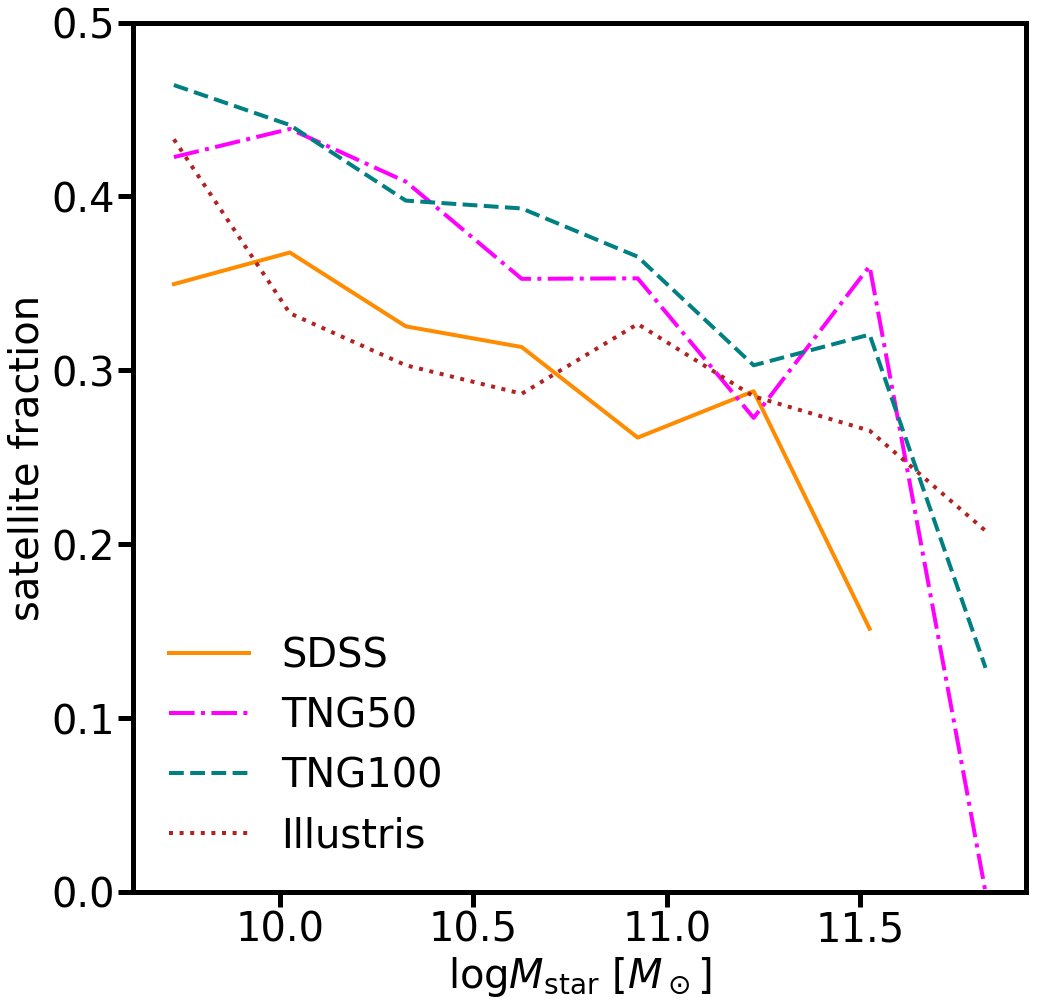

In [54]:
bins = np.arange(9.5,12,0.3)

for dset, (lab, col, ls) in zip([SDSS,TNG50,TNG, Illustris], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'], ['-','-.','--',':'])):  
    h = np.histogram(dset['Mstar'],bins=bins)[0]
    if lab=='SDSS':
        hsat = np.histogram(dset.query('LCentSat==0')['Mstar'],bins=bins)[0]
    else:
        hsat = np.histogram(dset.query('LCentSat==0')['Mstar'],bins=bins)[0]
    plt.plot(bins[1:]-0.075,hsat/h, color=col, ls=ls, label=lab, lw=4)
    #plt.plot(bins[1:]-0.05,h, color=col, ls=ls, label=lab+' all', lw=2)
    
plt.legend(frameon=False)
plt.xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
plt.ylabel('satellite fraction')
#plt.title('quiescent galaxies')
plt.ylim(0,0.5)

# impose cut in Mhalo and repeat

In [43]:
mhalomin = SDSS[SDSS['Mhalo']>0]['Mhalo'].min()

prova = TNG[TNG['Mhalo']>mhalomin]
prova50 = TNG50[TNG50['Mhalo']>mhalomin]
ill = Illustris[Illustris['Mhalo']>mhalomin]

prova_cen = prova.query('LCentSat==1')
prova_sat = prova.query('LCentSat==0')
prova50_cen = prova50.query('LCentSat==1')
prova50_sat = prova50.query('LCentSat==0')
ill_cen = ill.query('LCentSat==1')
ill_sat = ill.query('LCentSat==0')

Text(0.5, 0, 'Mstar')

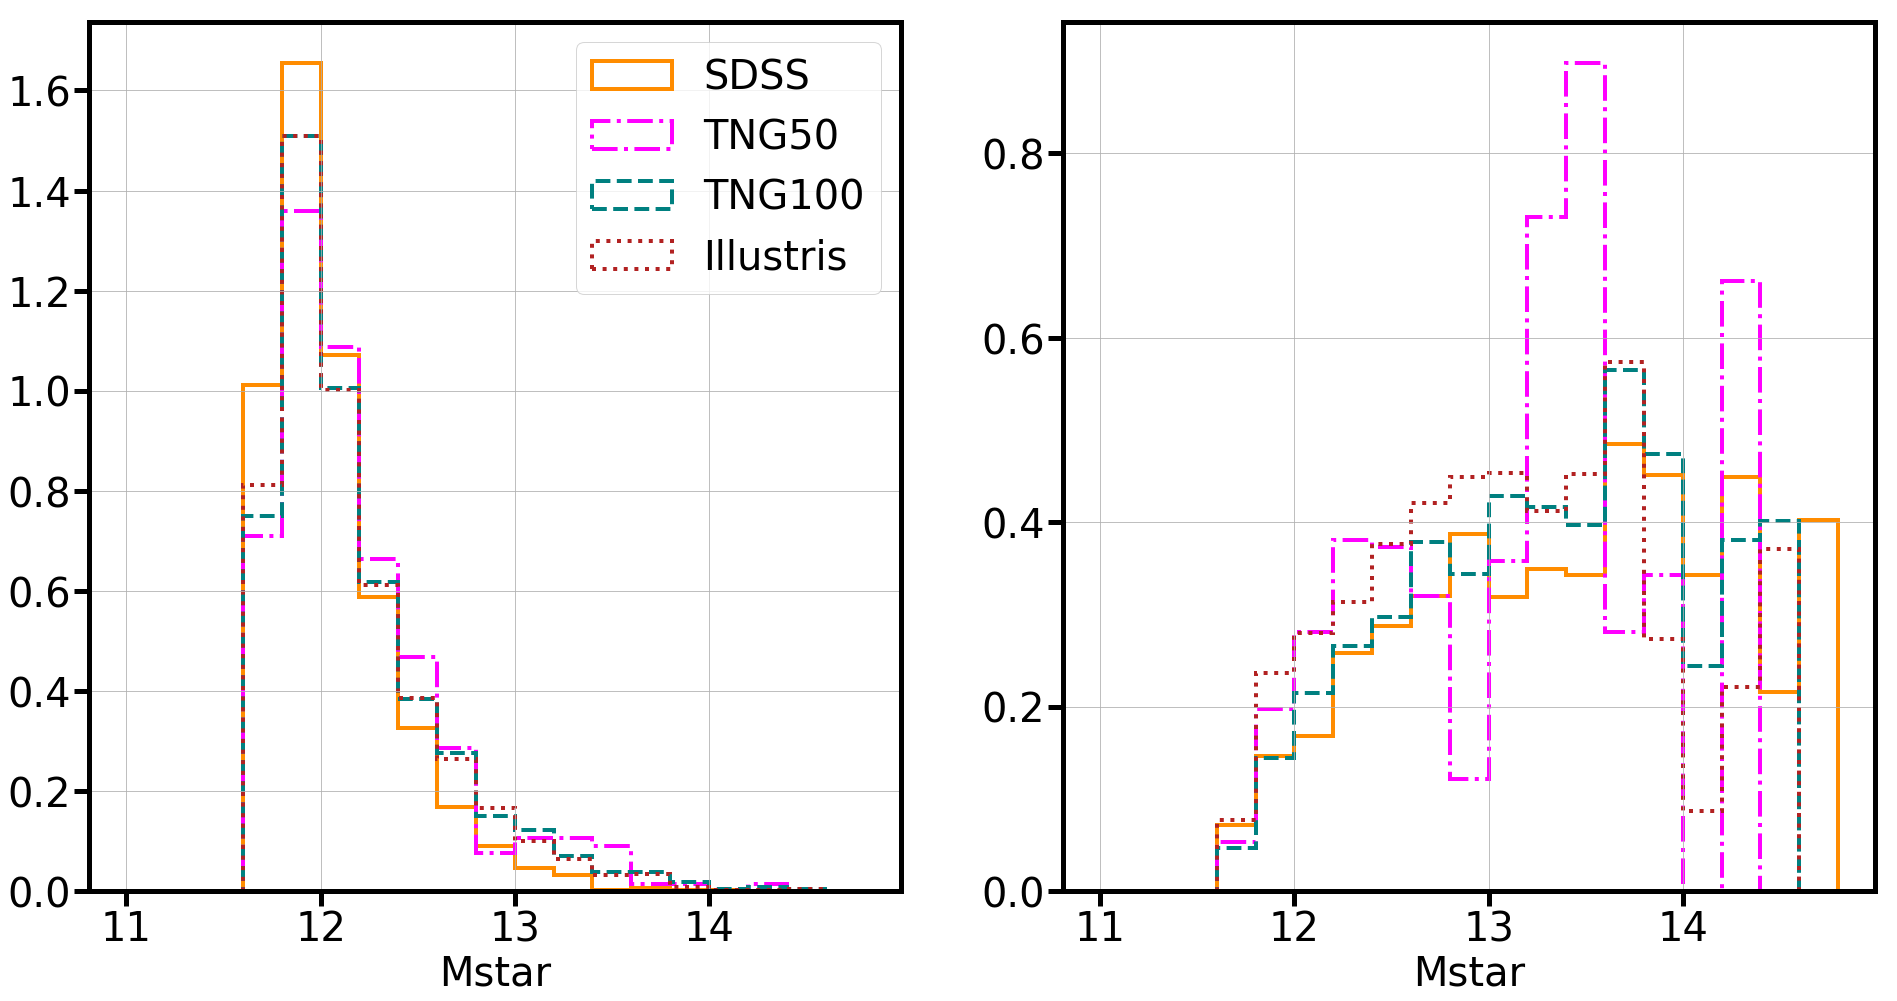

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(32,16))

bins = np.arange(11,15,0.2)
SDSS_cen['Mhalo'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=True,ax=ax1, ls='-', label='SDSS')
prova50_cen['Mhalo'].hist(bins=bins, color='magenta',lw=4, histtype='step', density=True,ax=ax1,ls='-.', label='TNG50')
prova_cen['Mhalo'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True,ax=ax1, ls='--', label='TNG100')
ill_cen['Mhalo'].hist(bins=bins, color='firebrick',lw=4, histtype='step', density=True,ax=ax1, ls=':', label='Illustris')


SDSS_sat['Mhalo'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=True,ax=ax2, ls='-')
prova50_sat['Mhalo'].hist(bins=bins, color='magenta',lw=4, histtype='step', density=True,ax=ax2,ls='-.')
prova_sat['Mhalo'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True,ax=ax2, ls='--')
ill_sat['Mhalo'].hist(bins=bins, color='firebrick',lw=4, histtype='step', density=True,ax=ax2, ls=':')

ax1.legend()
ax1.set_xlabel('Mstar')
ax2.set_xlabel('Mstar')

Text(0.5, 0, 'Mstar')

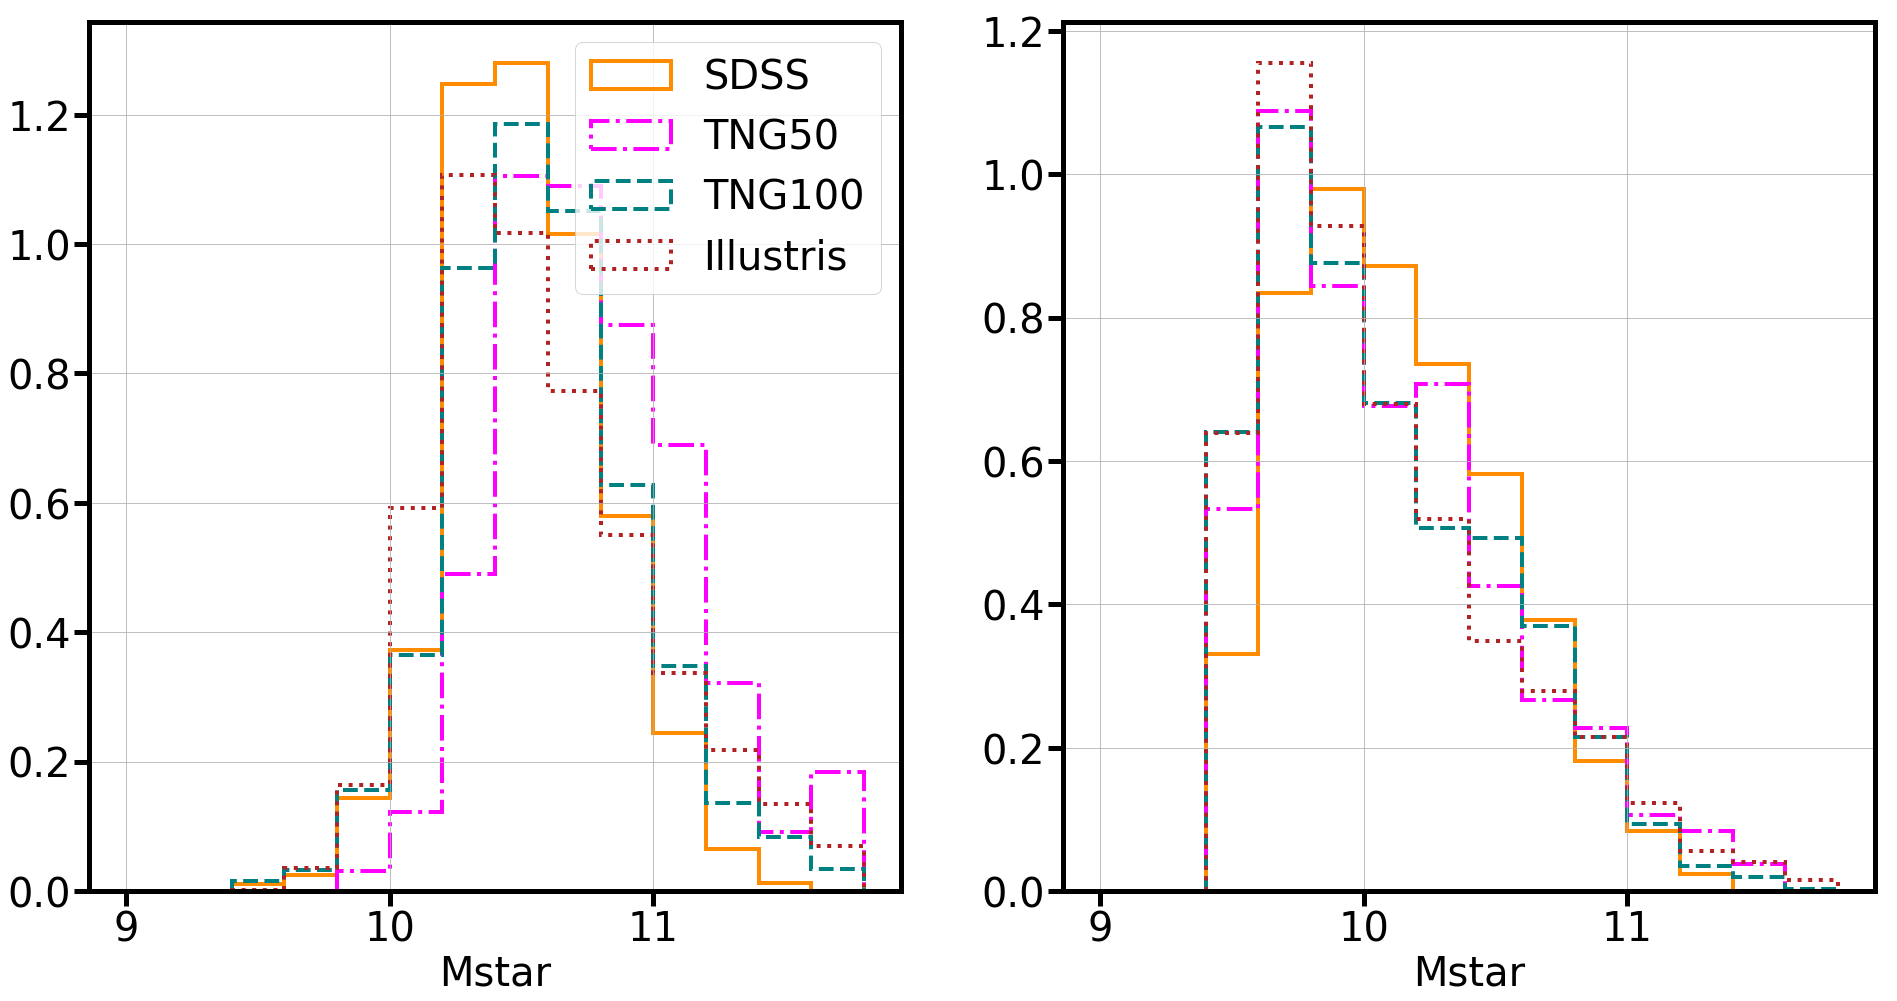

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(32,16))

bins = np.arange(9,12,0.2)
SDSS_cen.query(f'Mhalo>{mhalomin}')['Mstar'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=True,ax=ax1, ls='-', label='SDSS')
prova50_cen['Mstar'].hist(bins=bins, color='magenta',lw=4, histtype='step', density=True,ax=ax1,ls='-.', label='TNG50')
prova_cen['Mstar'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True,ax=ax1, ls='--', label='TNG100')
ill_cen['Mstar'].hist(bins=bins, color='firebrick',lw=4, histtype='step', density=True,ax=ax1, ls=':', label='Illustris')


SDSS_sat['Mstar'].hist(bins=bins, color='darkorange',lw=4, histtype='step', density=True,ax=ax2, ls='-')
prova50_sat['Mstar'].hist(bins=bins, color='magenta',lw=4, histtype='step', density=True,ax=ax2,ls='-.')
prova_sat['Mstar'].hist(bins=bins, color='teal',lw=4, histtype='step', density=True,ax=ax2, ls='--')
ill_sat['Mstar'].hist(bins=bins, color='firebrick',lw=4, histtype='step', density=True,ax=ax2, ls=':')

ax1.legend()
ax1.set_xlabel('Mstar')
ax2.set_xlabel('Mstar')

In [29]:
SDSS_large_cen.shape

(7085, 76)

/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(0, 1)

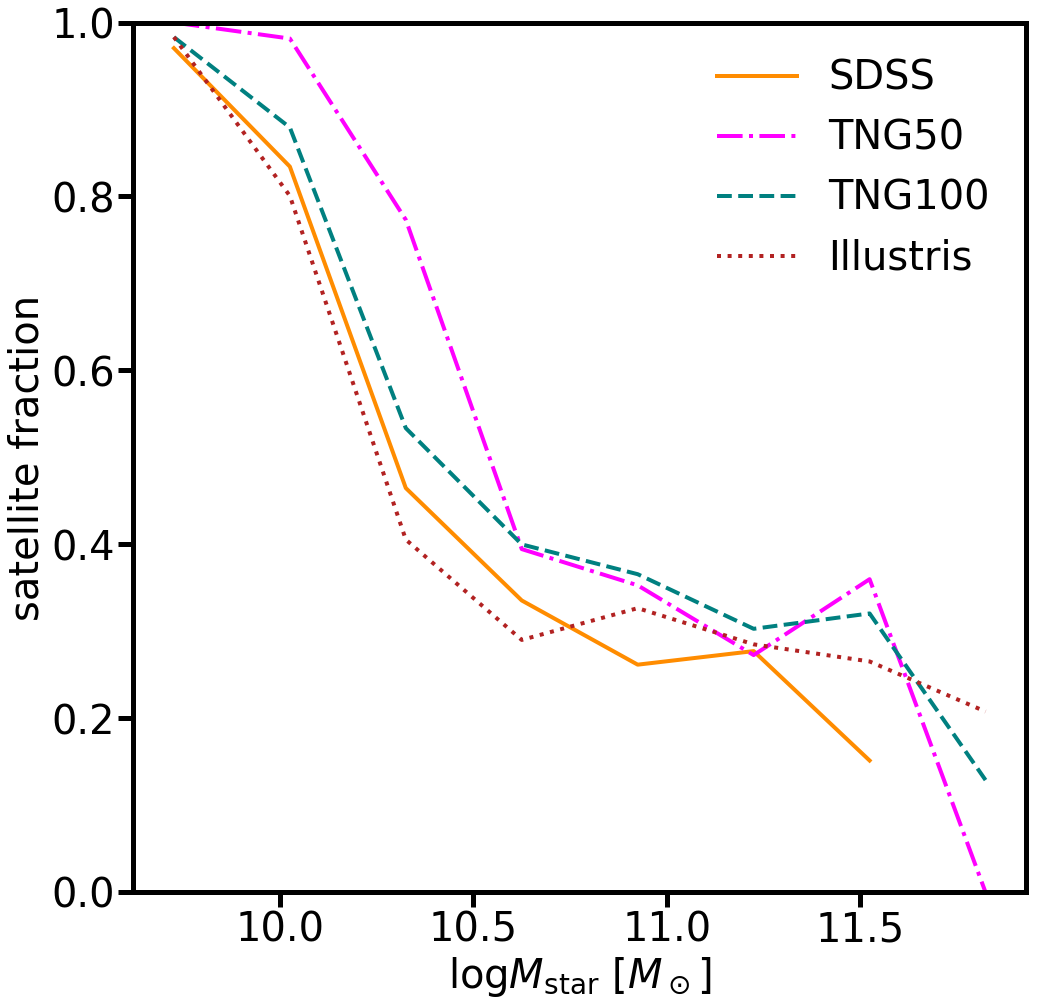

In [46]:
bins = np.arange(9.5,12,0.3)

for dset, (lab, col, ls) in zip([SDSS.query('Mhalo>0'),prova50,prova, ill], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'], ['-','-.','--',':'])):  
    h = np.histogram(dset['Mstar'],bins=bins)[0]
    if lab=='SDSS':
        hsat = np.histogram(dset.query('LCentSat==0')['Mstar'],bins=bins)[0]
    else:
        hsat = np.histogram(dset.query('LCentSat==0')['Mstar'],bins=bins)[0]
    plt.plot(bins[1:]-0.075,hsat/h, color=col, ls=ls, label=lab, lw=4)
    #plt.plot(bins[1:]-0.05,h, color=col, ls=ls, label=lab+' all', lw=2)
    
plt.legend(frameon=False)
plt.xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
plt.ylabel('satellite fraction')
#plt.title('quiescent galaxies')
plt.ylim(0,1)

# quiescent fractions

/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(0, 1)

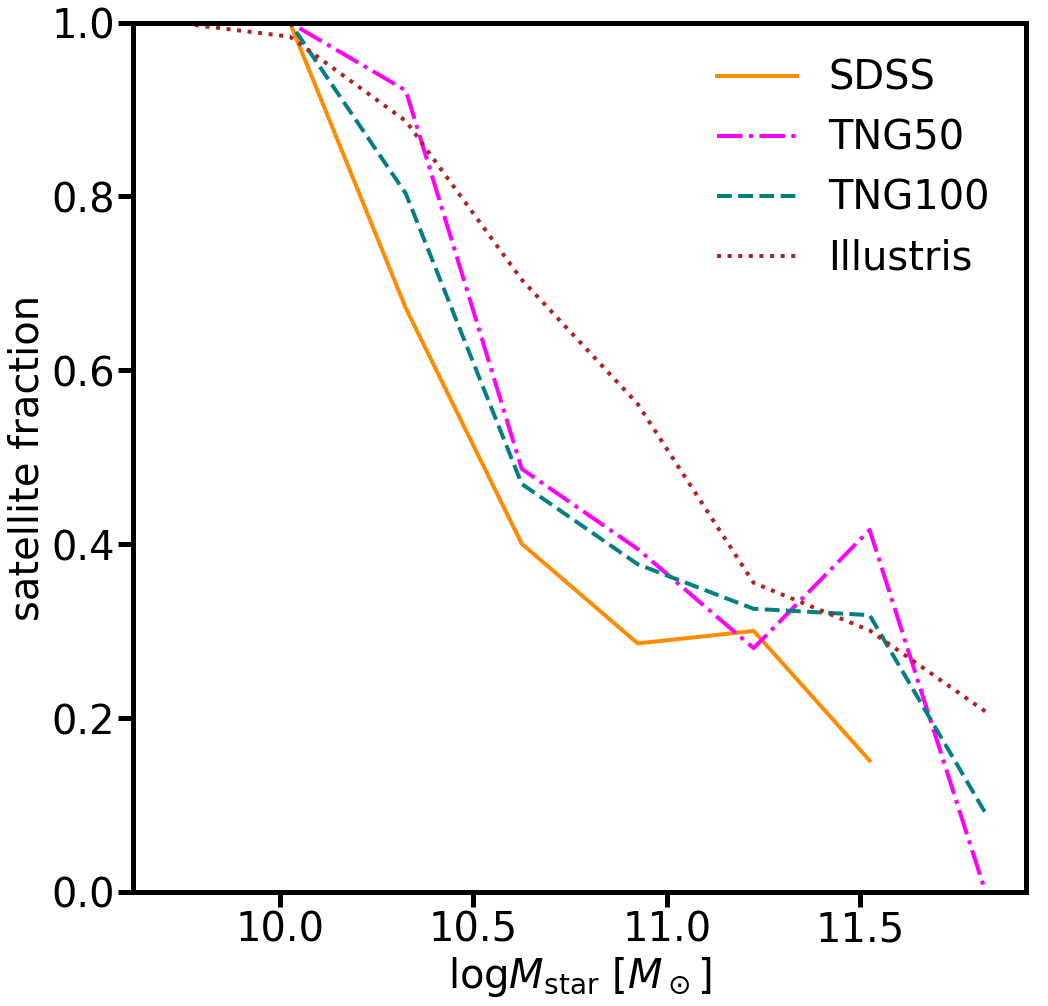

In [47]:
bins = np.arange(9.5,12,0.3)

for dset, (lab, col, ls) in zip([SDSS.query('Mhalo>0 & sSFR<-11'),prova50.query('sSFR<-11'),prova.query('sSFR<-11'), ill.query('sSFR<-11')], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                     ['darkorange','magenta','teal','firebrick'], ['-','-.','--',':'])):  
    h = np.histogram(dset['Mstar'],bins=bins)[0]
    if lab=='SDSS':
        hsat = np.histogram(dset.query('LCentSat==0')['Mstar'],bins=bins)[0]
    else:
        hsat = np.histogram(dset.query('LCentSat==0')['Mstar'],bins=bins)[0]
    plt.plot(bins[1:]-0.075,hsat/h, color=col, ls=ls, label=lab, lw=4)
    #plt.plot(bins[1:]-0.05,h, color=col, ls=ls, label=lab+' all', lw=2)
    
plt.legend(frameon=False)
plt.xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
plt.ylabel('satellite fraction')
#plt.title('quiescent galaxies')
plt.ylim(0,1)

bins of halo mass

In [49]:
mhalomin

11.718792685158226

/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


(0, 1)

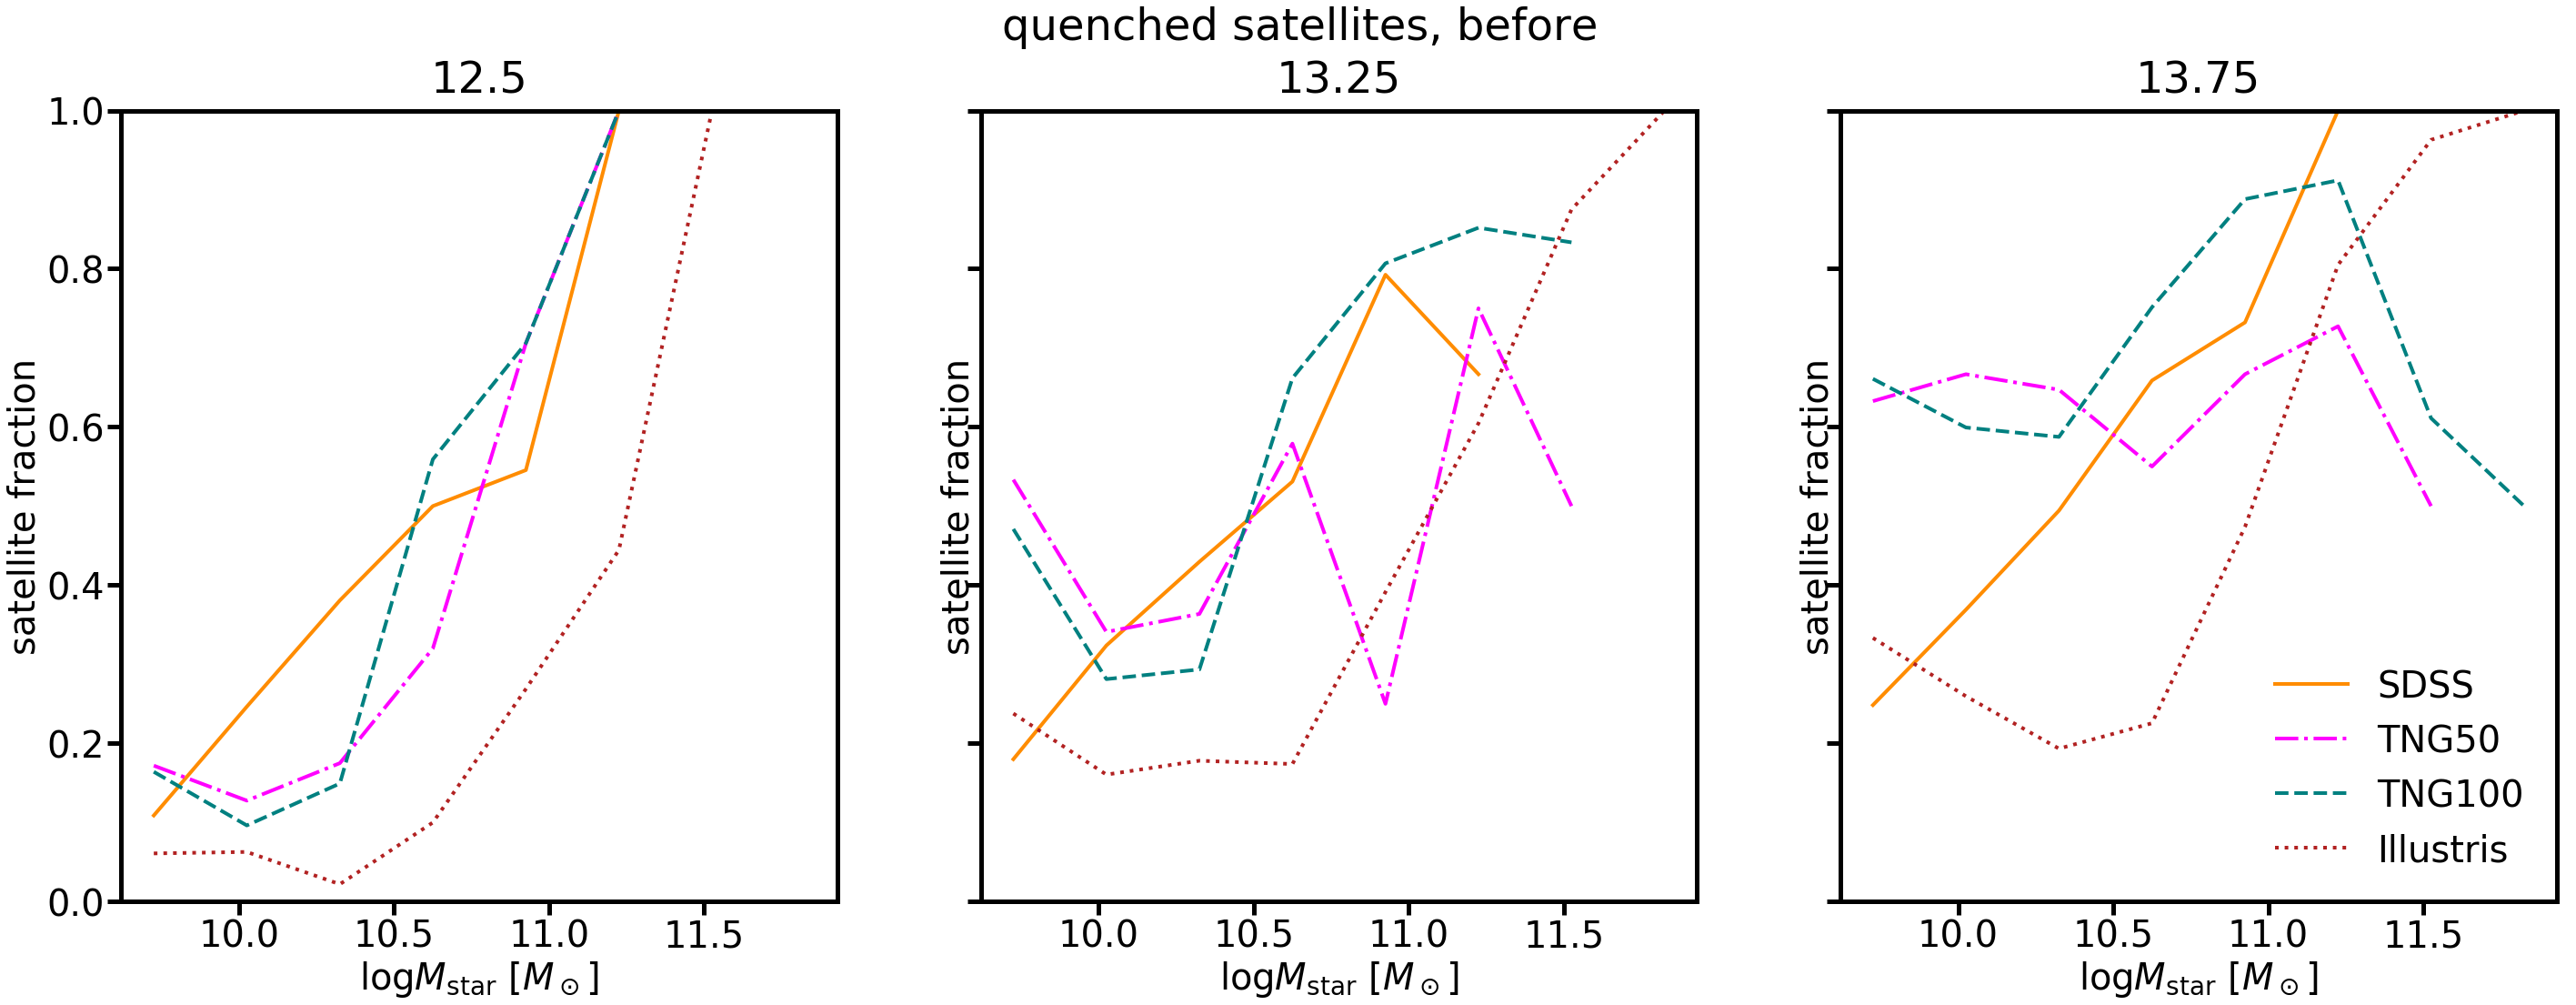

In [48]:
fig, ax = plt.subplots(1,3,sharey=True,sharex=True, figsize=(48,16))

bins = np.arange(9.5,12,0.3)

halobin = [12,13,13.5,14]

for i,a in enumerate(ax):

    SDSS_ = SDSS.query(f'Mhalo>0 &   Mhalo>{halobin[i]} & Mhalo<{halobin[i+1]}')
    prova50_ = TNG50.query(f'  Mhalo>{halobin[i]} & Mhalo<{halobin[i+1]}')
    prova_ = TNG.query(f'  Mhalo>{halobin[i]} & Mhalo<{halobin[i+1]}')
    ill_ = Illustris.query(f'  Mhalo>{halobin[i]} & Mhalo<{halobin[i+1]}')
    for dset, (lab, col, ls) in zip([SDSS_, prova50_, prova_, ill_], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                         ['darkorange','magenta','teal','firebrick'], ['-','-.','--',':'])):  
        h = np.histogram(dset.query('LCentSat==0')['Mstar'],bins=bins)[0]
        if lab=='SDSS':
            hsat = np.histogram(dset.query('LCentSat==0 & MediansSFR<-11')['Mstar'],bins=bins)[0]
        else:
            hsat = np.histogram(dset.query('LCentSat==0 & sSFR<-11')['Mstar'],bins=bins)[0]
        a.plot(bins[1:]-0.075,hsat/h, color=col, ls=ls, label=lab, lw=4)
    #plt.plot(bins[1:]-0.05,h, color=col, ls=ls, label=lab+' all', lw=2)
    a.set_xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
    a.set_ylabel('satellite fraction')
    a.set_title((halobin[i]+halobin[i+1])/2)
plt.legend(frameon=False)
plt.suptitle('quenched satellites, before')
#plt.title('quiescent galaxies')
plt.ylim(0,1)

/scratch/lzanisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


(0, 1)

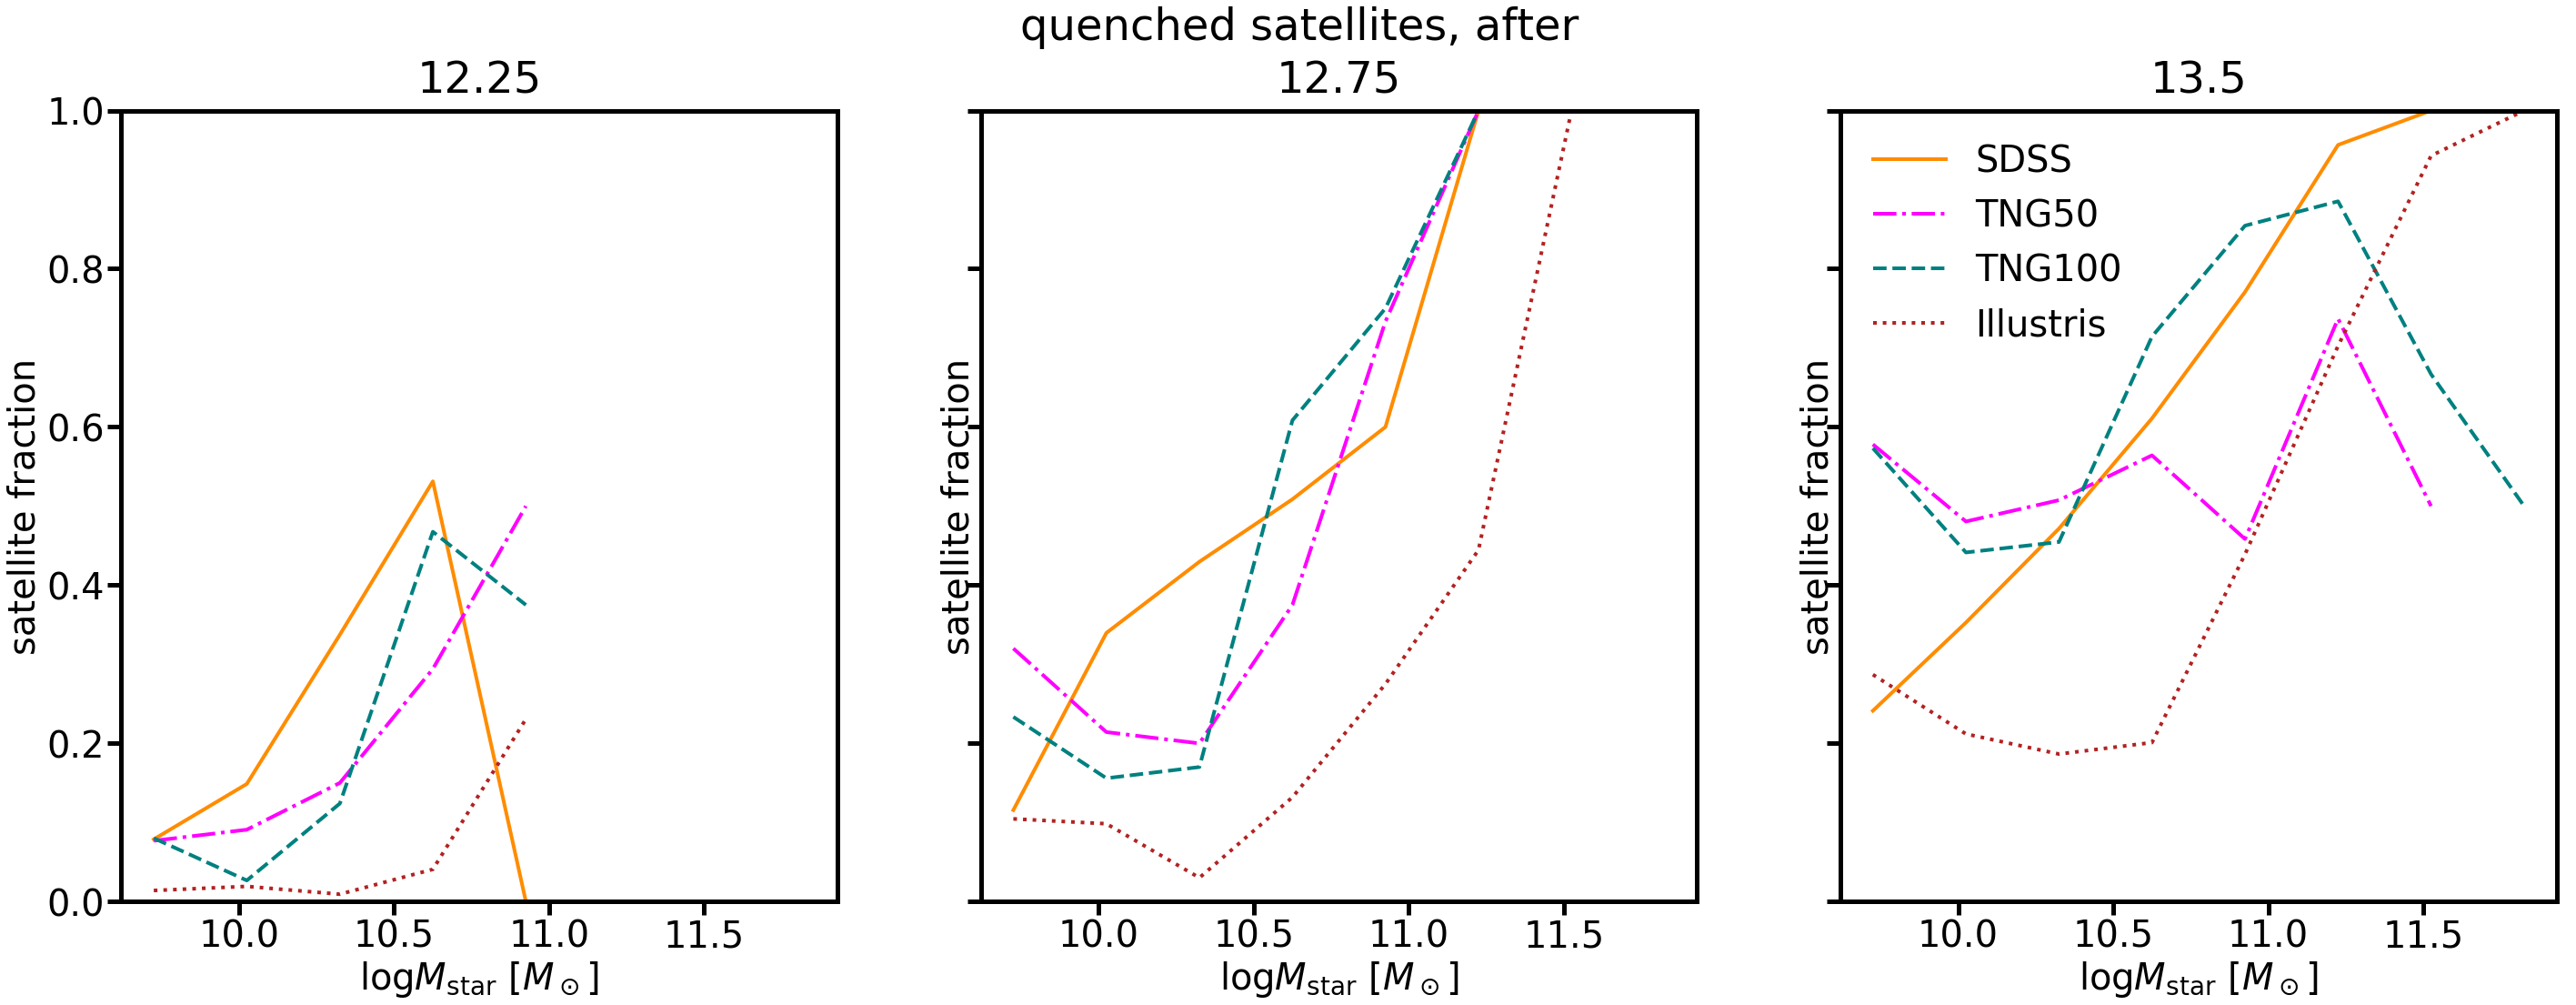

In [56]:
fig, ax = plt.subplots(1,3,sharey=True,sharex=True, figsize=(48,16))

bins = np.arange(9.5,12,0.3)

halobin = [12,12.5,13,14]

for i,a in enumerate(ax):

    SDSS_ = SDSS.query(f'Mhalo>0 &   Mhalo>{halobin[i]} & Mhalo<{halobin[i+1]}')
    prova50_ = prova50.query(f'  Mhalo>{halobin[i]} & Mhalo<{halobin[i+1]}')
    prova_ = prova.query(f'  Mhalo>{halobin[i]} & Mhalo<{halobin[i+1]}')
    ill_ = ill.query(f'  Mhalo>{halobin[i]} & Mhalo<{halobin[i+1]}')
    for dset, (lab, col, ls) in zip([SDSS_, prova50_, prova_, ill_], zip(['SDSS','TNG50','TNG100','Illustris'],\
                                         ['darkorange','magenta','teal','firebrick'], ['-','-.','--',':'])):  
        h = np.histogram(dset.query('LCentSat==0')['Mstar'],bins=bins)[0]
        if lab=='SDSS':
            hsat = np.histogram(dset.query('LCentSat==0 & sSFR<-11')['Mstar'],bins=bins)[0]
        else:
            hsat = np.histogram(dset.query('LCentSat==0 & sSFR<-11')['Mstar'],bins=bins)[0]
        a.plot(bins[1:]-0.075,hsat/h, color=col, ls=ls, label=lab, lw=4)
    #plt.plot(bins[1:]-0.05,h, color=col, ls=ls, label=lab+' all', lw=2)
    a.set_xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
    a.set_ylabel('satellite fraction')
    a.set_title((halobin[i]+halobin[i+1])/2)
plt.legend(frameon=False)
plt.suptitle('quenched satellites, after')
#plt.title('quiescent galaxies')
plt.ylim(0,1)

In [ ]:
SDSS_large  = pd.read_csv('/scratch/lzanisi/pixel-cnn/data/Catalog_SDSS_complete.dat',sep=' ')
SDSS_large = SDSS_large.rename(columns={'MsMendSerExp':'Mstar'})
SDSS_large['sSFR']  = SDSS_large.apply(lambda row: row.SFR-row.Mstar,axis=1)
SDSS_large_cen = SDSS_large.query('NewLCentSat==1')
SDSS_large_sat = SDSS_large.query('NewLCentSat==0')


bins = np.arange(9.5,12.5,0.5)
fig, (ax1,ax2,ax3,ax4 ) = plt.subplots(1,4, figsize=(48,16))

hcen = np.histogram(SDSS_large_cen['Mstar'],bins=bins)[0]#,weights=SDSS_large_cen.query('sSFR<-11')['Vmaxwt'])[0]
hsat = np.histogram(SDSS_large_sat['Mstar'],bins=bins)[0]#,weights=SDSS_large_sat.query('sSFR<-11')['Vmaxwt'])[0]
h= np.histogram(SDSS_large['Mstar'],bins=bins,weights=SDSS_large['Vmaxwt'])[0]

ax1.plot(bins[1:],hsat,label='sat')
ax1.plot(bins[1:],hcen,label='cen')
ax1.set_yscale('log')


hcen = np.histogram(TNG50_cen['Mstar'],bins=bins)[0]
hsat = np.histogram(TNG50_sat['Mstar'],bins=bins)[0]
ax2.plot(bins[1:],hsat,label='sat')
ax2.plot(bins[1:],hcen,label='cen')
ax2.set_yscale('log')

hcen = np.histogram(TNG_cen['Mstar'],bins=bins)[0]
hsat = np.histogram(TNG_sat['Mstar'],bins=bins)[0]
ax3.plot(bins[1:],hsat,label='sat')
ax3.plot(bins[1:],hcen,label='cen')
ax3.set_yscale('log')

hcen = np.histogram(Illustris_cen['Mstar'],bins=bins)[0]
hsat = np.histogram(Illustris_sat['Mstar'],bins=bins)[0]
ax4.plot(bins[1:],hsat,label='sat')
ax4.plot(bins[1:],hcen,label='cen')
ax4.set_yscale('log')

In [ ]:
bins = np.arange(9.5,12,0.1)

for dset, (lab, col, ls) in zip([SDSS_.query('LLR<500 '),SDSS_large,TNG50,TNG, Illustris], zip(['SDSS','SDSS-orig','TNG50','TNG100','Illustris'],\
                                     ['darkorange','brown','magenta','teal','firebrick'], ['-','-','-.','--',':'])):
    plt.hist(dset['Mstar'],bins=bins, histtype='step', density=True,color=col, ls=ls, label=lab, lw=4)
    plt.axvline(dset['Mstar'].median(), color=col, lw=2, ls=ls)
    plt.grid(False)
    
plt.legend(frameon=False)
plt.xlabel(r'$\log{M_{\rm star}} \ [M_\odot]$')
plt.ylabel('#')